In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import logging

# If you were using an Estimator from tf.contrib.learn, replace it with tf.estimator.Estimator
# estimator = tf.estimator.Estimator(...)

# Set logging level
logging.getLogger('tensorflow').setLevel(logging.ERROR)


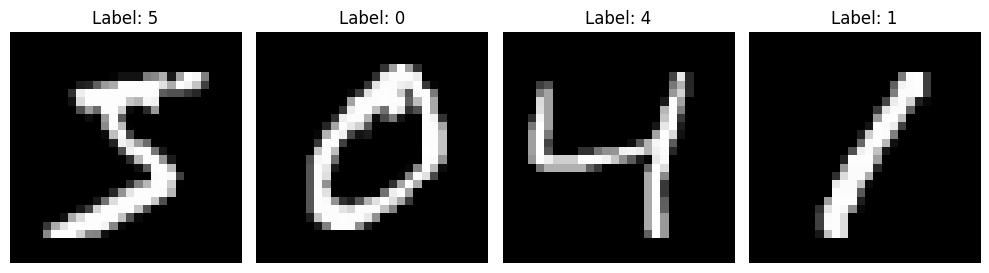

In [5]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Print 4 images in a row
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4675 - loss: 1.7426
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.7126
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.5289
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8876 - loss: 0.4576
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9036 - loss: 0.3925
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9059 - loss: 0.3635
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9102 - loss: 0.3504
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9169 - loss: 0.3345
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9150 - loss: 0.3204
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9180 - loss: 0.3125
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8949 - loss: 0.3856
Test Accuracy: 0.9092000126838684
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58

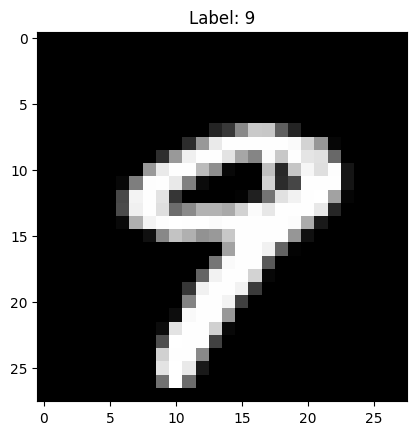

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Sample 0: Prediction: 7, Label: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Sample 1: Prediction: 2, Label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Sample 2: Prediction: 1, Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Sample 3: Prediction: 0, Label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Sample 4: Prediction: 4, Label: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Sample 5: Prediction: 1, Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Sample 6: Prediction: 4, Label: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sample 7: Prediction: 9, Label: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sample 8: Prediction: 6, Label: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Sample 9: Prediction: 9, Label: 9


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Normalize the data to the range [0, 1] and flatten
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data = train_data.reshape(-1, 28 * 28)  # Flatten to 1D array
test_data = test_data.reshape(-1, 28 * 28)  # Flatten to 1D array

# Limit to a maximum of 10,000 examples
max_examples = 10000
train_data = train_data[:max_examples]
train_labels = train_labels[:max_examples]

# Build and compile the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='softmax', input_shape=(28 * 28,))
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, batch_size=100, epochs=10)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy:", test_accuracy)

# Function to display an image
def display(i):
    img = test_data[i].reshape(28, 28)  # Reshape to 28x28 for display
    plt.title('Label: {}'.format(test_labels[i]))
    plt.imshow(img, cmap='gray')
    plt.show()

# Function to predict and display a specific number
def predict_and_display(index):
    # Make a prediction
    prediction = model.predict(np.array([test_data[index]]))
    predicted_class = np.argmax(prediction, axis=1)[0]

    print("Prediction: {}, Label: {}".format(predicted_class, test_labels[index]))

    # Display the image
    display(index)

# Predict and display for a specific index, for example, index 10
predict_and_display(9)

# Check model's predictions for several test samples to ensure it's not stuck on 0
for i in range(10):
    prediction = model.predict(np.array([test_data[i]]))
    predicted_class = np.argmax(prediction, axis=1)[0]
    print(f"Sample {i}: Prediction: {predicted_class}, Label: {test_labels[i]}")
